In [1]:
!pip install statsmodels

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
sales_data = pd.read_csv('sales.csv')

In [4]:
sales_data.head()

,Time,Sales
0,01/01/17,271.5
1,01/02/17,151.4
2,01/03/17,188.6
3,01/04/17,124.8
4,01/05/17,185.8


In [5]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

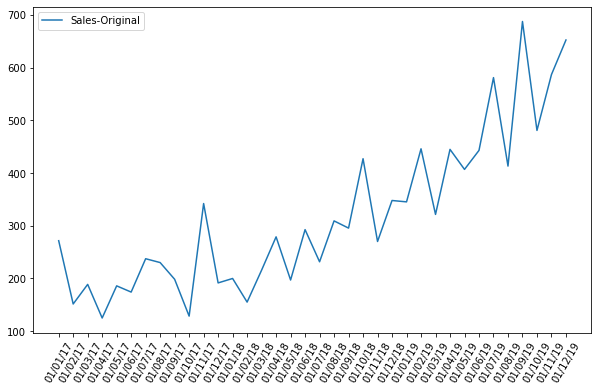

In [7]:
plt.figure(figsize=(10,6))
plt.plot(sales_data['Time'], sales_data['Sales'], label='Sales-Original')
plt.xticks(rotation=60)
plt.legend()
plt.show()

In [8]:
sales_data['3MA']=sales_data['Sales'].rolling(window=3).mean()
sales_data['5MA']=sales_data['Sales'].rolling(window=5).mean()

In [9]:
sales_data.head()

,Time,Sales,3MA,5MA
0,01/01/17,271.5,NaN,NaN
1,01/02/17,151.4,NaN,NaN
2,01/03/17,188.6,203.833333,NaN
3,01/04/17,124.8,154.933333,NaN
4,01/05/17,185.8,166.400000,184.42


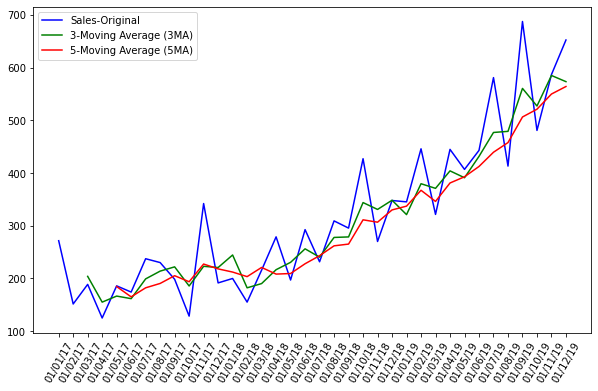

In [10]:
plt.figure(figsize=(10,6))
plt.plot(sales_data['Time'], sales_data['Sales'], label='Sales-Original', color='blue')
plt.plot(sales_data['Time'], sales_data['3MA'], label='3-Moving Average (3MA)', color='green')
plt.plot(sales_data['Time'], sales_data['5MA'], label='5-Moving Average (5MA)', color='red')

plt.xticks(rotation=60)

plt.legend()
plt.show()

In [11]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [12]:
sales_data = pd.read_csv('sales.csv', index_col='Time')

In [13]:
sales_data.head()

,Sales
Time,
01/01/17,271.5
01/02/17,151.4
01/03/17,188.6
01/04/17,124.8
01/05/17,185.8


In [14]:
sales_data['simple']=sales_data.Sales.rolling(window=3).mean()
sales_data['boxcar']=sales_data.Sales.rolling(3,win_type='boxcar').mean()
sales_data['triang']=sales_data.Sales.rolling(3,win_type='triang').mean()
sales_data['hamming']=sales_data.Sales.rolling(3,win_type='hamming').mean()
sales_data['blackman']=sales_data.Sales.rolling(3,win_type='blackman').mean()

In [15]:
sales_data.head()

,Sales,simple,boxcar,triang,hamming,blackman
Time,,,,,,
01/01/17,271.5,NaN,NaN,NaN,NaN,NaN
01/02/17,151.4,NaN,NaN,NaN,NaN,NaN
01/03/17,188.6,203.833333,203.833333,190.725,162.248276,151.4
01/04/17,124.8,154.933333,154.933333,163.350,181.634483,188.6
01/05/17,185.8,166.400000,166.400000,156.000,133.406897,124.8


<AxesSubplot:xlabel='Time'>

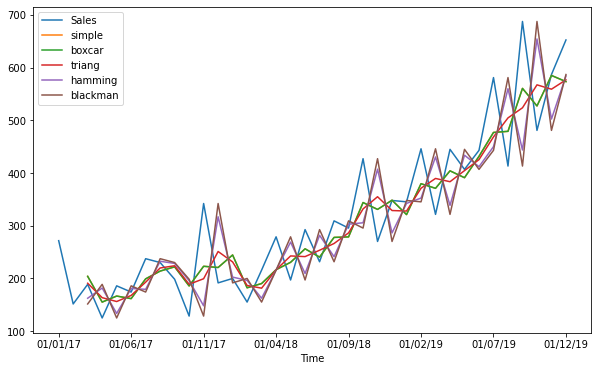

In [16]:
sales_data.plot(kind='line', figsize=(10,6))

In [17]:
import statsmodels.api as sm
import pandas as pd
import statsmodels.tsa.stattools as ts
import numpy as np

In [32]:
def calc_adf(x,y):
    result = sm.OLS(x,y).fit()
    return ts.adfuller(result.resid)

In [26]:
data = sm.datasets.sunspots.load_pandas().data.values
N = len(data)

In [36]:
t = np.linspace(-2*np.pi, 2*np.pi, N)
sine = np.sin(np.sin(t))
print('Self ADF', calc_adf(sine,sine))

Self ADF (nan, nan, 0, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -inf)


C:\Users\Min-A\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [37]:
noise = np.random.normal(0,.01,N)
print('ADF sine with noise', calc_adf(sine, sine+noise))

ADF sine with noise (-13.474650941854042, 3.330375129742213e-25, 1, 307, {'1%': -3.4518314994261337, '5%': -2.8710009653519166, '10%': -2.571810878948318}, -1833.6893694497135)


In [39]:
cosine = 100*np.cos(t) + 10
print('ADF sine vs cosine with noise', calc_adf(sine, cosine+noise))

ADF sine vs cosine with noise (-20.157171475928607, 0.0, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -11038.44855434328)


In [40]:
print('Sine vs sunspots', calc_adf(sine, data))

Sine vs sunspots (-6.7242691810701, 3.4210811915549524e-09, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -1102.5867415291168)


In [41]:
sales_data

,Sales,simple,boxcar,triang,hamming,blackman
Time,,,,,,
01/01/17,271.5,NaN,NaN,NaN,NaN,NaN
01/02/17,151.4,NaN,NaN,NaN,NaN,NaN
01/03/17,188.6,203.833333,203.833333,190.725,162.248276,151.4
01/04/17,124.8,154.933333,154.933333,163.350,181.634483,188.6
01/05/17,185.8,166.400000,166.400000,156.000,133.406897,124.8
01/06/17,174.0,161.533333,161.533333,167.600,180.779310,185.8
01/07/17,237.3,199.033333,199.033333,192.775,179.179310,174.0
01/08/17,230.0,213.766667,213.766667,219.650,232.431034,237.3
01/09/17,198.3,221.866667,221.866667,223.900,228.317241,230.0


In [48]:
first_diffs = sales_data.Sales.values[1:] - sales_data.Sales.values[:-1]

In [45]:
sales_data.Sales.values

array([271.5, 151.4, 188.6, 124.8, 185.8, 174. , 237.3, 230. , 198.3,
       128.4, 342. , 191.4, 199.8, 155. , 215.6, 278.8, 196.9, 292.5,
       231.5, 309.1, 295.4, 427.1, 270. , 347.8, 345.2, 445.9, 321.4,
       444.8, 406.8, 442.9, 581. , 413.1, 687.5, 480.8, 586.8, 652.4])

In [46]:
sales_data.Sales.values[1:]

array([151.4, 188.6, 124.8, 185.8, 174. , 237.3, 230. , 198.3, 128.4,
       342. , 191.4, 199.8, 155. , 215.6, 278.8, 196.9, 292.5, 231.5,
       309.1, 295.4, 427.1, 270. , 347.8, 345.2, 445.9, 321.4, 444.8,
       406.8, 442.9, 581. , 413.1, 687.5, 480.8, 586.8, 652.4])

In [47]:
sales_data.Sales.values[:-1]

array([271.5, 151.4, 188.6, 124.8, 185.8, 174. , 237.3, 230. , 198.3,
       128.4, 342. , 191.4, 199.8, 155. , 215.6, 278.8, 196.9, 292.5,
       231.5, 309.1, 295.4, 427.1, 270. , 347.8, 345.2, 445.9, 321.4,
       444.8, 406.8, 442.9, 581. , 413.1, 687.5, 480.8, 586.8])

In [49]:
np.concatenate([first_diffs,[0]])

array([-120.1,   37.2,  -63.8,   61. ,  -11.8,   63.3,   -7.3,  -31.7,
        -69.9,  213.6, -150.6,    8.4,  -44.8,   60.6,   63.2,  -81.9,
         95.6,  -61. ,   77.6,  -13.7,  131.7, -157.1,   77.8,   -2.6,
        100.7, -124.5,  123.4,  -38. ,   36.1,  138.1, -167.9,  274.4,
       -206.7,  106. ,   65.6,    0. ])

In [55]:
calc_adf(sine,sine)[1]

C:\Users\Min-A\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


nan

In [56]:
def calc_ols(x,y):
    result = sm.OLS(x,y).fit()
    return result

In [87]:
lags = 2
series = [np.random.normal() for _ in range(lags)]
series = [1,2]
coefs = [0.2,0.3]

prev_vals = series[-lags:][::-1]
new_val = np.array(prev_vals)*coefs
prev_vals, new_val

([2, 1], array([0.4, 0.3]))

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [96]:
data = pd.read_csv('beer_production.csv')

In [97]:
data.columns = ['date', 'data']

In [98]:
data['date'] = pd.to_datetime(data['date'])

In [100]:
data = data.set_index('date')

In [102]:
decomposed_data = seasonal_decompose(data,model='multiplicative')

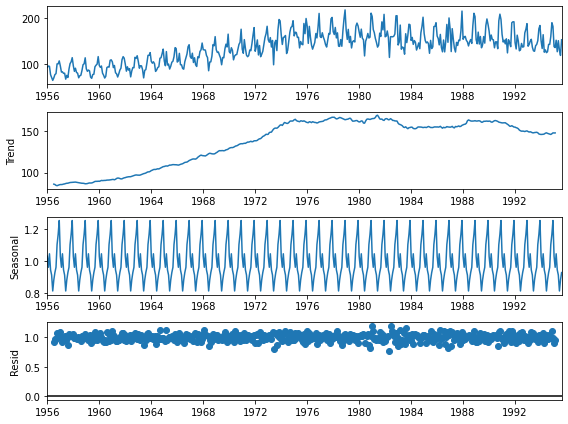

In [114]:
import pylab
pylab.rcParams['figure.figsize']=(8,6)
decomposed_data.plot()
plt.show()

In [115]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [116]:
data = sm.datasets.sunspots.load_pandas().data

In [117]:
data

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [121]:
dy = data.SUNACTIVITY - np.mean(data.SUNACTIVITY)

In [123]:
dy_square = np.sum(dy**2)

In [128]:
sun_correlated = np.correlate(dy, dy, mode='full')/dy_square
sun_correlated

array([ 4.16005488e-03,  7.35392370e-03,  9.45407174e-03,  9.74446137e-03,
        8.19929138e-03,  3.03682789e-03, -2.02345366e-03, -5.56254208e-03,
       -7.74343103e-03, -6.67682848e-03, -1.68619311e-03,  6.94073528e-03,
        1.29711184e-02,  1.49240478e-02,  1.07412574e-02,  1.44431277e-03,
       -1.31542606e-02, -2.93591190e-02, -3.96967162e-02, -4.46102438e-02,
       -3.83095346e-02, -2.20348111e-02, -3.87930625e-03,  9.52294487e-03,
        1.31735425e-02,  1.76951271e-03, -2.30399876e-02, -5.22734018e-02,
       -7.53268215e-02, -8.68155833e-02, -8.02140871e-02, -5.69698094e-02,
       -2.47842174e-02,  8.47600833e-03,  2.94186190e-02,  2.96813500e-02,
        5.74675551e-03, -2.85378146e-02, -7.13593679e-02, -1.01116095e-01,
       -1.09693973e-01, -9.17985931e-02, -5.19359310e-02,  3.75324419e-03,
        5.70723680e-02,  8.51789007e-02,  8.01257706e-02,  3.66237927e-02,
       -2.90453116e-02, -9.18693265e-02, -1.30282749e-01, -1.35417226e-01,
       -1.07006152e-01, -

In [126]:
result = sun_correlated[int(len(sun_correlated)/2):]

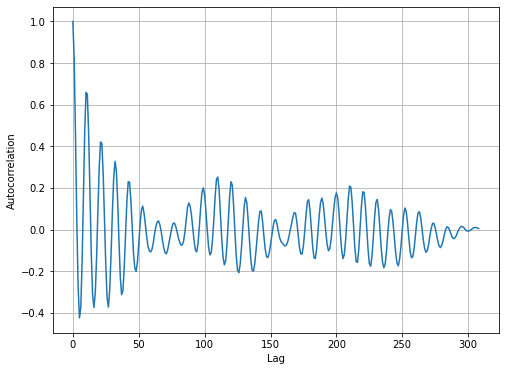

In [130]:
plt.plot(result)
plt.grid(True)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

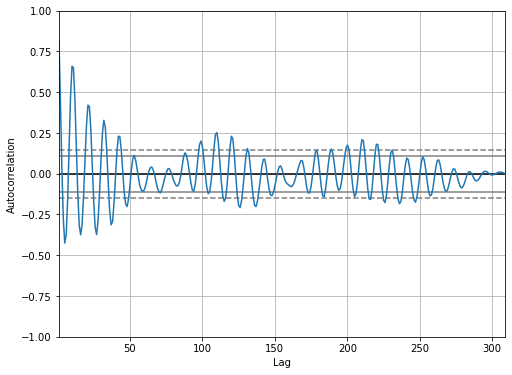

In [131]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data.SUNACTIVITY)

In [132]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt

In [133]:
data = sm.datasets.sunspots.load_pandas().data

In [145]:
train_ratio = 0.8

In [146]:
train = data[:int(train_ratio*len(data))]

In [148]:
test = data[int(train_ratio*len(data)):]

In [153]:
ar_model = AR(train.SUNACTIVITY)
ar_model = ar_model.fit()

In [154]:
print('Number of Lags:', ar_model.k_ar)
print('Model Coefficients:\n', ar_model.params)

Number of Lags: 15
Model Coefficients:
 const              9.382322
L1.SUNACTIVITY     1.225684
L2.SUNACTIVITY    -0.512193
L3.SUNACTIVITY    -0.130695
L4.SUNACTIVITY     0.193492
L5.SUNACTIVITY    -0.168907
L6.SUNACTIVITY     0.054594
L7.SUNACTIVITY    -0.056725
L8.SUNACTIVITY     0.109404
L9.SUNACTIVITY     0.108993
L10.SUNACTIVITY   -0.117063
L11.SUNACTIVITY    0.200454
L12.SUNACTIVITY   -0.075111
L13.SUNACTIVITY   -0.114437
L14.SUNACTIVITY    0.177516
L15.SUNACTIVITY   -0.091978
dtype: float64


In [155]:
start_point = len(train)
end_point = start_point + len(test) - 1
pred = ar_model.predict(start=start_point, end = end_point, dynamic = False)

In [156]:
mae = mean_absolute_error(test.SUNACTIVITY, pred)
mse = mean_squared_error(test.SUNACTIVITY, pred)
rmse = sqrt(mse)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 31.17846098350036
MSE: 1776.9463826165768
RMSE: 42.15384184883481


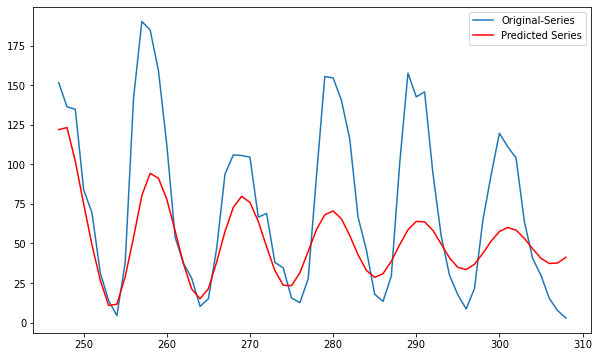

In [157]:
plt.figure(figsize=(10,6))
plt.plot(test.SUNACTIVITY, label='Original-Series')
plt.plot(pred, color='red', label='Predicted Series')
plt.legend()
plt.show()

In [159]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [165]:
data = sm.datasets.sunspots.load_pandas().data

In [161]:
data

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [166]:
train_ratio = 0.8
train = data[:int(train_ratio*len(data))]
test = data[int(train_ratio*len(data)):]

In [167]:
arma_model = ARMA(train.SUNACTIVITY, order=(10,1))
arma_model = arma_model.fit()
start_point = len(train)
end_point = start_point + len(test) -1
pred = arma_model.predict(start_point, end_point)

C:\Users\Min-A\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [169]:
mae = mean_absolute_error(test.SUNACTIVITY, pred)
mse = mean_squared_error(test.SUNACTIVITY, pred)
rmse = sqrt(mse)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 33.954603192159645
MSE: 2041.3883427366504
RMSE: 45.18172576093846


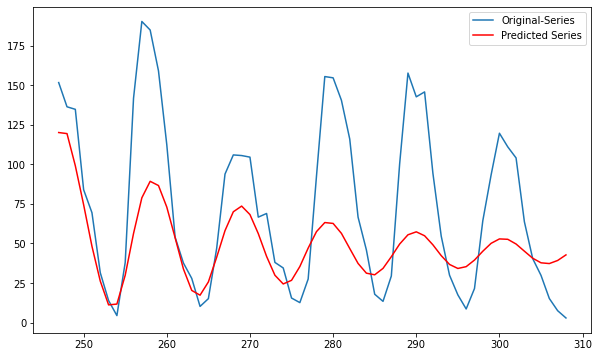

In [173]:

plt.figure(figsize=(10,6))
plt.plot(test.SUNACTIVITY, label='Original-Series')
plt.plot(pred, color='red', label='Predicted Series')
plt.legend()
plt.show()

In [185]:
import numpy as np
import statsmodels.api as sm
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [187]:
def model(p,t):
    C, p1, f1, phi1, p2, f2, phi2, p3, f3, phi3 = p
    return C + p1*np.sin(f1*t + phi1) + p2*np.sin(f2*t + phi2) + p3*np.sin(f3*t+phi3)

In [176]:
def error(p, y, t):
    return y - model(p,t)

In [188]:
def fit(y, t):
    p0 = [y.mean(), 0, 2*np.pi/11, 0, 0, 2*np.pi/22, 0, 0, 2*np.pi/100, 0]
    params = leastsq(error, p0, args=(y,t))[0]
    return params

In [178]:
data_loader = sm.datasets.sunspots.load_pandas()

In [179]:
sunspots = data_loader.data['SUNACTIVITY'].values
years = data_loader.data['YEAR'].values

In [207]:
cutoff = int(.9*len(sunspots))
params = fit(sunspots[:cutoff], years[:cutoff])
print('Params', params)

pred = model(params, years[cutoff:])
actual = sunspots[cutoff:]

print('Root mean square error', np.sqrt(np.mean((actual-pred)**2)))
print('Mean absolute error', np.mean(np.abs(actual-pred)))
print('Mean absolute percentage error', 100 * np.mean(np.abs(actual-pred)/actual))
mid = (actual+pred)/2
print('Symmetric mean absolute percentage error', 100 * np.mean(np.abs(actual-pred)/mid))
print('Coefficient of determination', 1 - ((actual-pred)**2).sum()/((actual-actual.mean())**2).sum())

Params [ 47.18800335  28.89947427   0.56827284   6.51168781   4.55215008
   0.29372074 -14.30920341 -18.16523992   0.06574835  -4.37789699]
Root mean square error 59.561930255687216
Mean absolute error 44.581468315714496
Mean absolute percentage error 65.16404904506578
Symmetric mean absolute percentage error 78.44776724314043
Coefficient of determination -0.36352579271706853


In [210]:
year_range = data_loader.data['YEAR'].values[cutoff:]

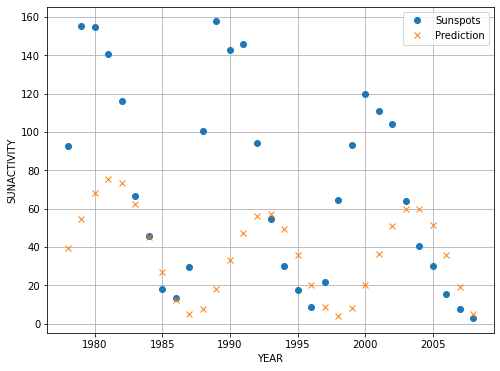

In [215]:
plt.plot(year_range, actual, 'o', label='Sunspots')
plt.plot(year_range, pred, 'x',label='Prediction')
plt.grid(True)
plt.xlabel('YEAR')
plt.ylabel('SUNACTIVITY')
plt.legend()
plt.show()

In [216]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft, fftshift

In [217]:
data = sm.datasets.sunspots.load_pandas().data

In [219]:
t = np.linspace(-2*np.pi, 2*np.pi, len(data.SUNACTIVITY.values))

In [254]:
mid = np.ptp(data.SUNACTIVITY.values)/2
sine = mid + mid * np.sin(np.sin(t))
sine2 = mid + mid * np.sin(t)

In [255]:
sine_fft = np.abs(fftshift(rfft(sine)))
sine2_fft = np.abs(fftshift(rfft(sine2)))

In [256]:
print('Index of max sine FFT', np.argsort(sine_fft)[-5:])
print('Index of max sine2 FFT', np.argsort(sine2_fft)[-5:])

Index of max sine FFT [160 157 166 158 154]
Index of max sine2 FFT [162 160 157 158 154]


In [251]:
transformed = np.abs(fftshift(rfft(data.SUNACTIVITY.values)))

In [237]:
print('Indices of max sunspots FFT', np.argsort(transformed)[-5:])

Indices of max sunspots FFT [205 212 215 209 154]


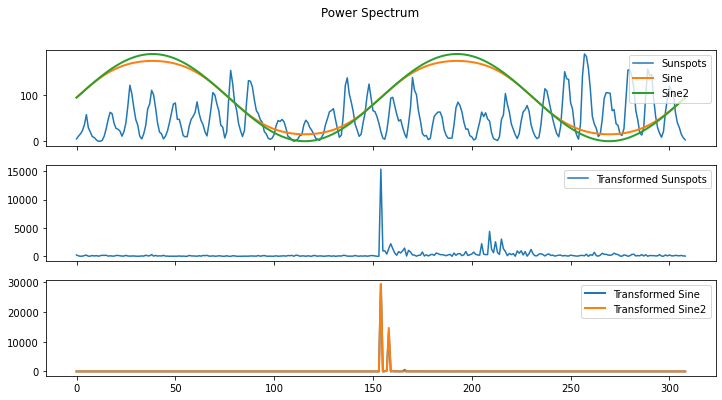

In [258]:
fig, axs = plt.subplots(3, figsize=(12,6), sharex=True)
fig.suptitle('Power Spectrum')
axs[0].plot(data.SUNACTIVITY.values, label='Sunspots')
axs[0].plot(sine, lw=2, label='Sine')
axs[0].plot(sine2, lw=2, label='Sine2')
axs[0].legend()
axs[1].plot(transformed, label='Transformed Sunspots')
axs[1].legend()
axs[2].plot(sine_fft, lw=2, label='Transformed Sine')
axs[2].plot(sine2_fft, lw=2, label='Transformed Sine2')
axs[2].legend()
plt.show()

In [260]:
import numpy as np
import statsmodels.api as sm
from scipy.fftpack import rfft
from scipy.fftpack import fftshift
import matplotlib.pyplot as plt

In [261]:
data = sm.datasets.sunspots.load_pandas().data

In [262]:
transformed = fftshift(rfft(data.SUNACTIVITY.values))
power = transformed **2
phase = np.angle(transformed)

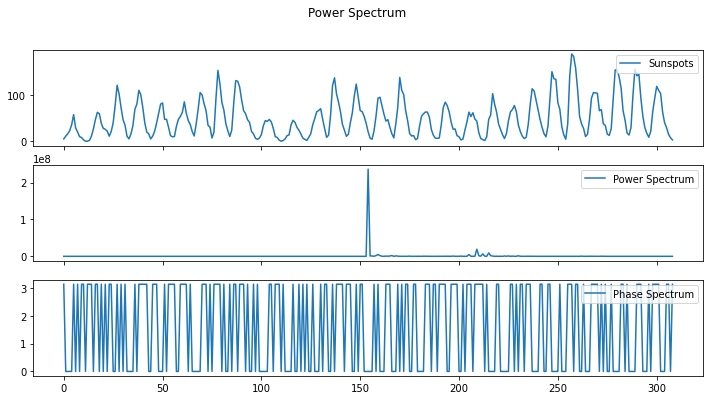

In [278]:
fig, axs = plt.subplots(3, figsize = (12,6), sharex=True)
fig.suptitle('Power Spectrum')
axs[0].plot(data.SUNACTIVITY.values, label='Sunspots')
axs[0].legend(loc='upper right')
axs[1].plot(power, label = 'Power Spectrum')
axs[1].legend()
axs[2].plot(phase, label='Phase Spectrum')
axs[2].legend()
plt.show()